# Step-by-step YOLOv8 Workflow in Colab


Upload directory in google drive and connect drive


Below will be you directory structure :


/content/drive/MyDrive/HackByte_Dataset/
│
├── dataset/                # Contains train/val/test folders in YOLO format
│   ├── train/images, labels/
│   ├── val/images, labels/
│   └── test/images, labels/
│
├── ENV_SETUP/              # Conda-related stuff (ignored in Colab unless you're using Jupyter+Conda locally)
│
├── classes.txt
├── predict.py
├── train.py
├── visualise.py
└── yolo_params.yaml


 ## 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
# Replace the path below if your dataset folder is in another location inside Drive.
%cd /content/drive/MyDrive/HackByte_Dataset

/content/drive/MyDrive/HackByte_Dataset


In [ ]:
# Verify Folder Contents
!ls

classes.txt  ENV_SETUP	 runs	   visualize.py  yolo_params.yaml
data	     predict.py  train.py  yolo11n.pt	 yolov3u.pt


## 2. Install YOLOv8 (Ultralytics)

In [ ]:
!pip install ultralytics

## checking gpu

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

CUDA available: True
Device: cuda


In [ ]:
from ultralytics.utils.torch_utils import select_device
device = select_device("cuda")
print(device)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
cuda:0


## 6. Train YOLOv8 Model

You can run your own script:

In [ ]:
!python train.py

used device is : 
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
cuda:0
----------
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/HackByte_Dataset/yolov3u.pt, data=/content/drive/MyDrive/HackByte_Dataset/yolo_params.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

## 7. Run Prediction

In [ ]:
!python predict.py

Select the training folder:
0: train
1: train2
2: train3
3: train4
4: train5
5: train6
6: train7
6

image 1/1 /content/drive/MyDrive/HackByte_Dataset/data/test/images/000000205.png: 384x640 1 ToolBox, 1 OxygenTank, 120.7ms
Speed: 4.2ms preprocess, 120.7ms inference, 302.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/HackByte_Dataset/data/test/images/000000211.png: 384x640 1 FireExtinguisher, 68.1ms
Speed: 2.3ms preprocess, 68.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/HackByte_Dataset/data/test/images/000000208.png: 384x640 1 ToolBox, 2 OxygenTanks, 68.1ms
Speed: 2.3ms preprocess, 68.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/HackByte_Dataset/data/test/images/000000210.png: 384x640 1 FireExtinguisher, 68.3ms
Speed: 4.0ms preprocess, 68.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/

## 8. Visualize Predictions

In [ ]:
!pip install opencv-python

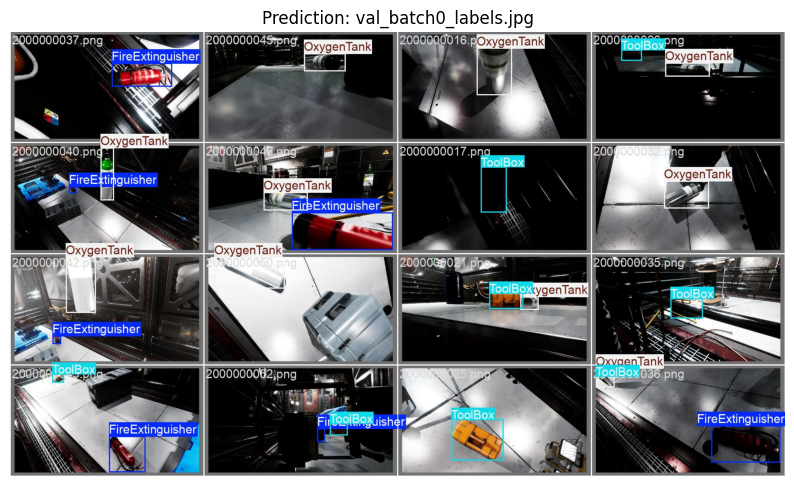

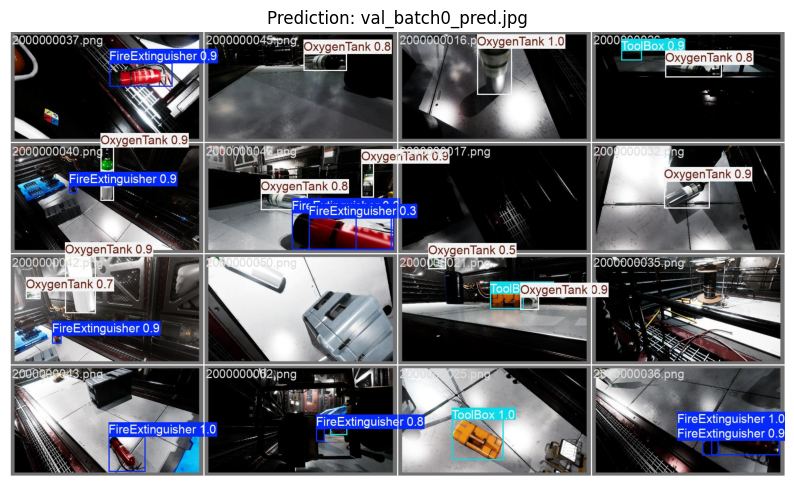

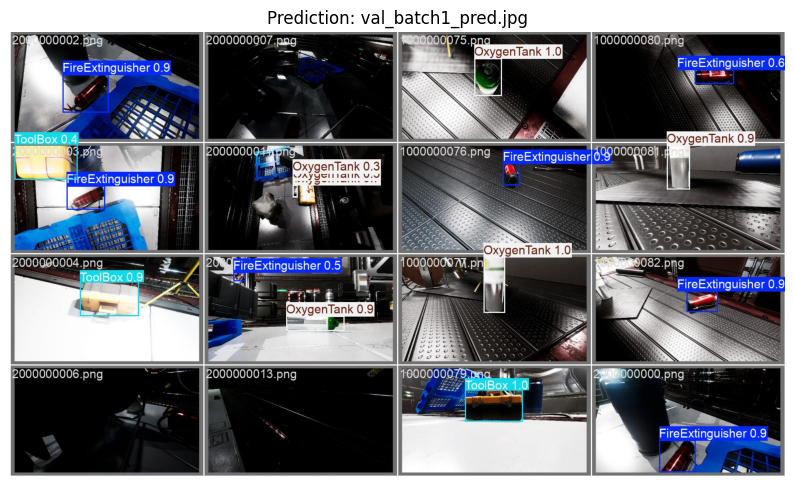

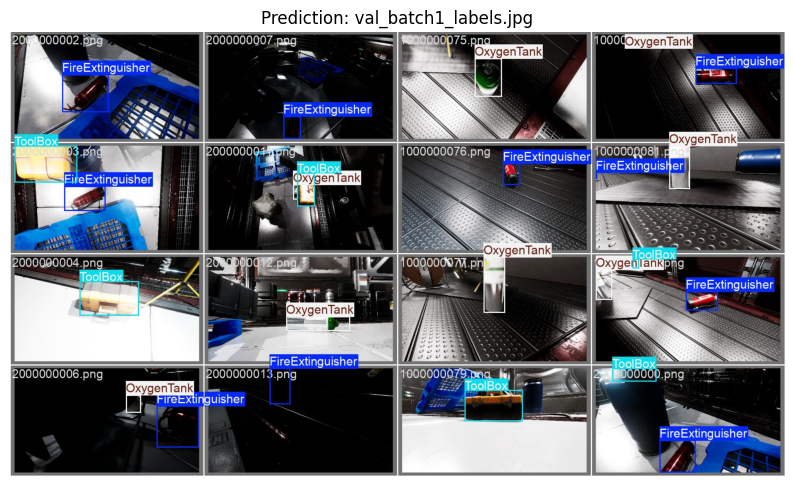

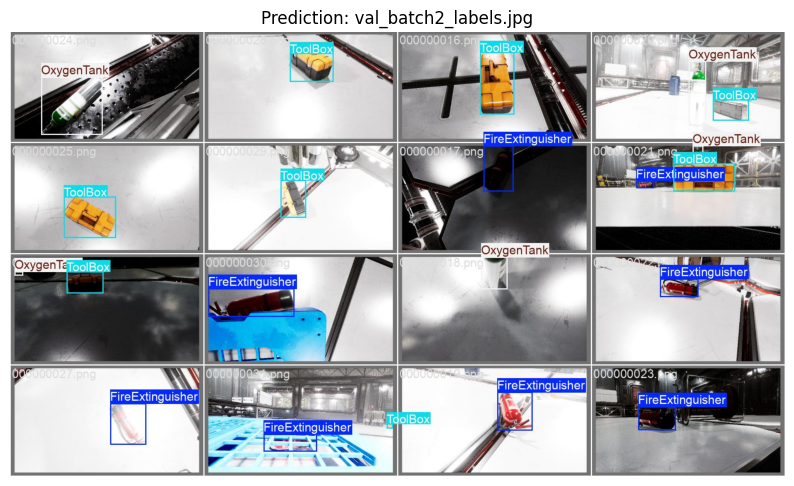

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Path where YOLOv5 saved visual predictions
val_output_path = "runs/detect/val"

# List all prediction images
image_files = [f for f in os.listdir(val_output_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Show a few images with bounding boxes
for img_name in image_files[:5]:  # show first 5
    img_path = os.path.join(val_output_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {img_name}")
    plt.axis("off")
    plt.show()